In [38]:
import pickle
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn import tree
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier




In [3]:
digits = load_digits()
X = digits.data
y = digits.target


In [4]:
X.shape, y.shape


((1797, 64), (1797,))

In [5]:
X[0].shape


(64,)

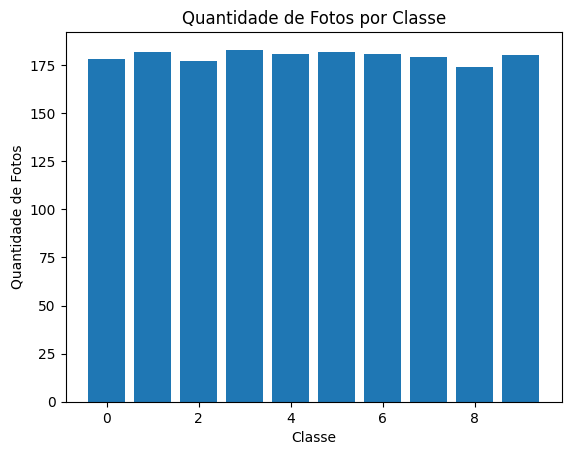

In [6]:
import matplotlib.pyplot as plt
from collections import Counter

contagem_classes = Counter(y)

classes = list(contagem_classes.keys())
quantidades = list(contagem_classes.values())

plt.bar(classes, quantidades)
plt.xlabel('Classe')
plt.ylabel('Quantidade de Fotos')
plt.title('Quantidade de Fotos por Classe')
plt.show()


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
simple_tree = DecisionTreeClassifier()


In [9]:
simple_tree.fit(X_train, y_train)


DecisionTreeClassifier()

In [10]:
y_pred = simple_tree.predict(X_test)


In [11]:
classification_report(y_test, y_pred).split('\n')


['              precision    recall  f1-score   support',
 '',
 '           0       0.97      0.88      0.92        33',
 '           1       0.81      0.79      0.80        28',
 '           2       0.96      0.76      0.85        33',
 '           3       0.79      0.88      0.83        34',
 '           4       0.75      0.91      0.82        46',
 '           5       0.90      0.94      0.92        47',
 '           6       0.87      0.94      0.90        35',
 '           7       0.88      0.88      0.88        34',
 '           8       0.81      0.70      0.75        30',
 '           9       0.89      0.80      0.84        40',
 '',
 '    accuracy                           0.86       360',
 '   macro avg       0.86      0.85      0.85       360',
 'weighted avg       0.86      0.86      0.86       360',
 '']

[Text(0.24320427389705881, 0.96875, 'x[36] <= 0.5\ngini = 0.9\nsamples = 1437\nvalue = [145, 154, 144, 149, 135, 135, 146, 145, 144, 140]'),
 Text(0.054411764705882354, 0.90625, 'x[42] <= 5.0\ngini = 0.539\nsamples = 223\nvalue = [143, 0, 3, 1, 6, 17, 4, 0, 3, 46]'),
 Text(0.14880801930147058, 0.9375, 'True  '),
 Text(0.029411764705882353, 0.84375, 'x[21] <= 6.5\ngini = 0.376\nsamples = 59\nvalue = [0, 0, 1, 1, 0, 12, 0, 0, 0, 45]'),
 Text(0.01764705882352941, 0.78125, 'x[26] <= 6.0\ngini = 0.272\nsamples = 13\nvalue = [0, 0, 1, 0, 0, 11, 0, 0, 0, 1]'),
 Text(0.011764705882352941, 0.71875, 'x[27] <= 11.5\ngini = 0.5\nsamples = 2\nvalue = [0, 0, 1, 0, 0, 0, 0, 0, 0, 1]'),
 Text(0.0058823529411764705, 0.65625, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.01764705882352941, 0.65625, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]'),
 Text(0.023529411764705882, 0.71875, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 0, 0, 0, 11, 0, 0, 0, 0]'),
 Te

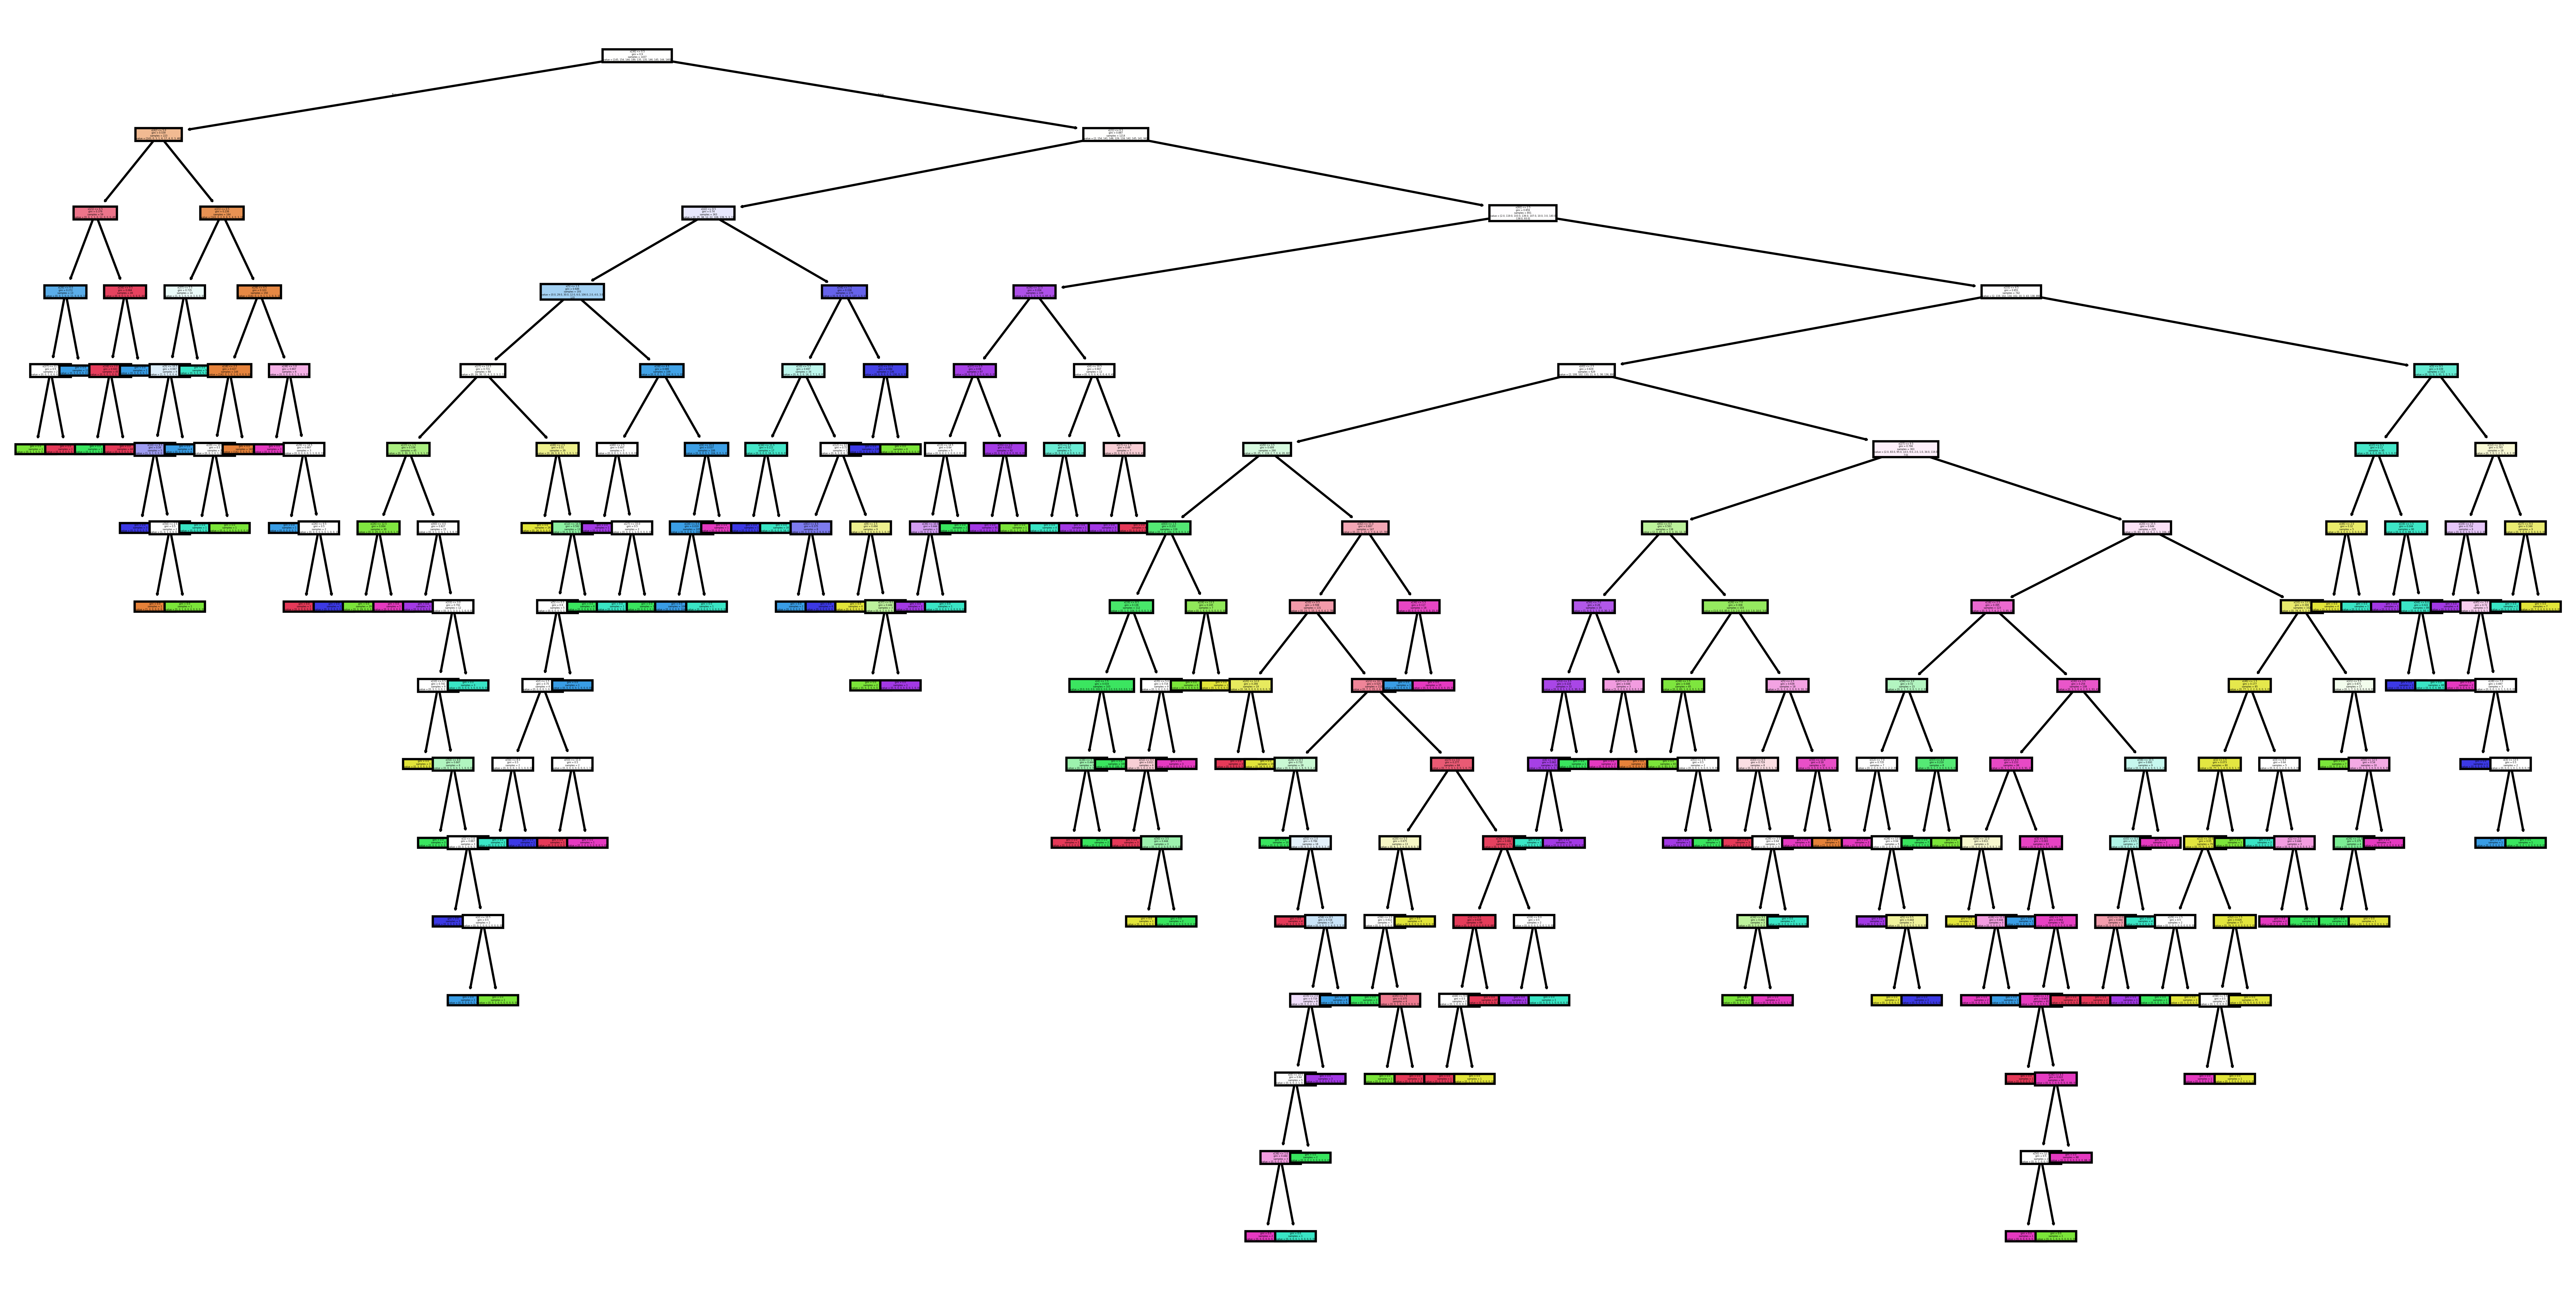

In [12]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (20,10), dpi=600)
tree.plot_tree(simple_tree, filled=True, rounded=False)


In [13]:
params = {
    'xgb__n_estimators': [10, 50, 100, 200],
    'xgb__max_depth': [3, 5, 7, 9],
    'xgb__learning_rate': [0.01, 0.1, 0.3, 0.5],
    'rf__n_estimators': [10, 50, 100, 200],
    'rf__max_depth': [3, 5, 7, 9],
    'gb__n_estimators': [10, 50, 100, 200],
    'gb__max_depth': [3, 5, 7, 9],
    'gb__learning_rate': [0.01, 0.1, 0.3, 0.5],
    'ada__n_estimators': [10, 50, 100, 200],
    'ada__learning_rate': [0.01, 0.1, 0.3, 0.5],
    'bag__n_estimators': [10, 50, 100, 200]
}

classifiers = {
    'xgb': XGBClassifier(),
    'rf': RandomForestClassifier(),
    'gb': GradientBoostingClassifier(),
    'ada': AdaBoostClassifier(),
    'bag': BaggingClassifier()
}


In [14]:
best_models = {}
for name, clf in classifiers.items():
    param_grid = {k[len(name) + 2:]: v for k, v in params.items() if k.startswith(name)}
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=10)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_


Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


c:\Users\knd\.virtualenvs\mba-deeplearning-iad-006-2024-public-iolVk-1o\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Fitting 5 folds for each of 64 candidates, totalling 320 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


c:\Users\knd\.virtualenvs\mba-deeplearning-iad-006-2024-public-iolVk-1o\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [15]:

voting_clf = VotingClassifier(estimators=[(name, model) for name, model in best_models.items()], voting='soft')
voting_clf.fit(X_train, y_train)


c:\Users\knd\.virtualenvs\mba-deeplearning-iad-006-2024-public-iolVk-1o\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_ra...
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...)),
                             ('rf',
                              RandomForestClassifier(max_depth=9,
                                                     n_estimators=200)),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=0.3,
                                                         n_estimators=200)),
                             ('ada',
                              AdaBoostClassifier(learning_rate=0.5,
                                                 n_estimators=200)),
                             ('bag', BaggingClassifier(n_estimators=200))],
                 voting='soft')

In [16]:
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print("\n")


y_pred_voting = voting_clf.predict(X_test)
print("Classification Report for VotingClassifier:")
print(classification_report(y_test, y_pred_voting))


Classification Report for xgb:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      0.96      0.98        28
           2       0.94      1.00      0.97        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.96      0.98      0.97        47
           6       0.97      0.94      0.96        35
           7       0.97      0.97      0.97        34
           8       0.94      0.97      0.95        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.98       360



Classification Report for rf:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.93      1.00      0.97        28
           2   

In [17]:
best_models


{'xgb': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.3, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=3, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, objective='multi:softprob', ...),
 'rf': RandomForestClassifier(max_depth=9, n_estimators=200),
 'gb': GradientBoostingClassifier(learning_rate=0.3, n_estimators=200),
 'ada': AdaBoostClassifier(learning_rate=0.5, n_estimators=200),
 'bag': BaggingClass

In [18]:
gradientboost = best_models['gb']
gradientboost


GradientBoostingClassifier(learning_rate=0.3, n_estimators=200)

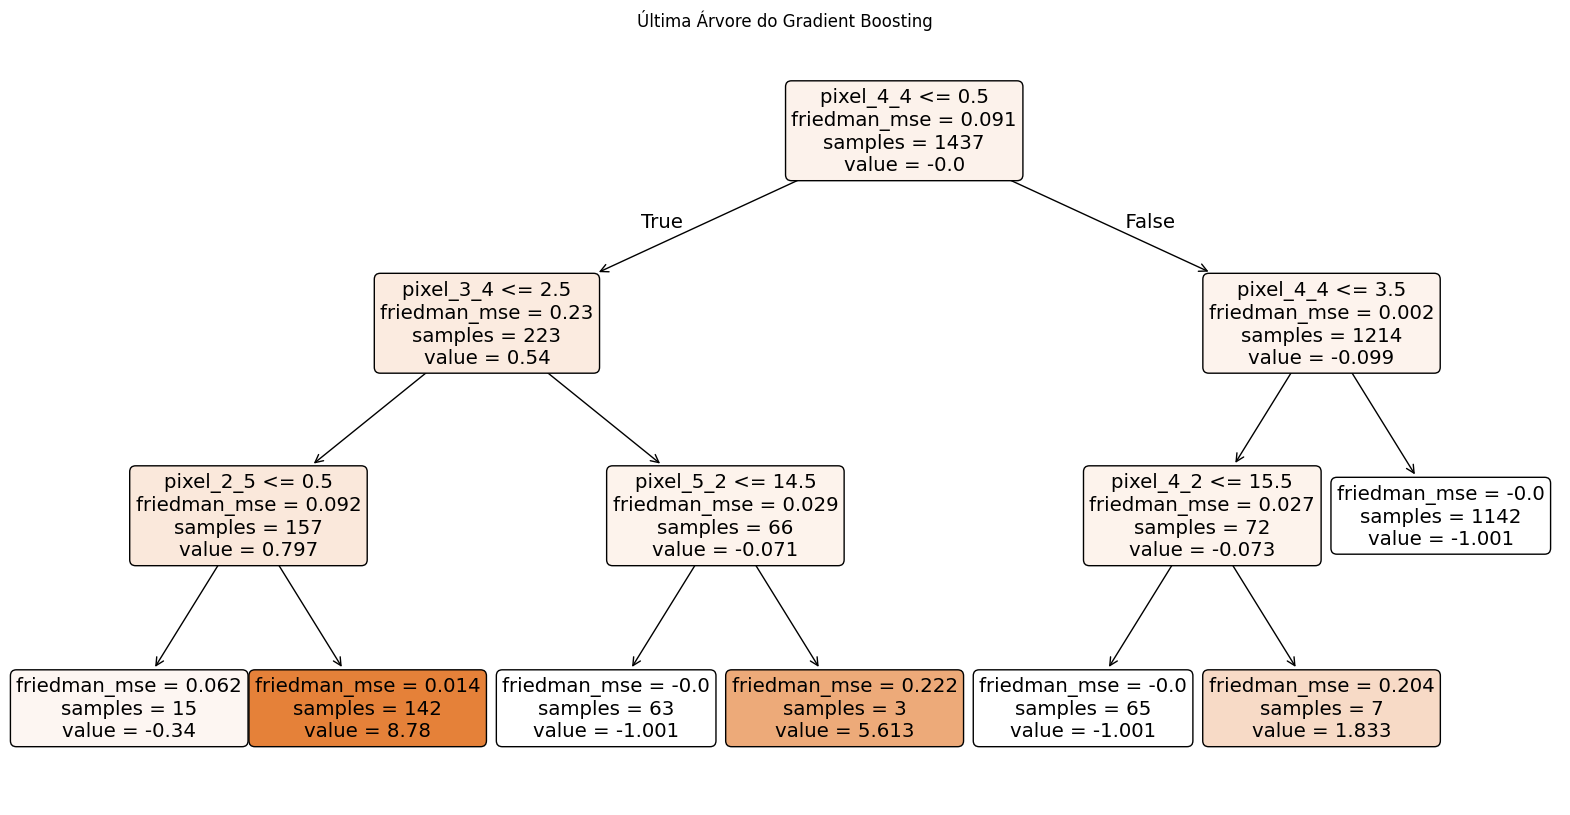

In [31]:
plt.figure(figsize=(20, 10))
plot_tree(gradientboost.estimators_[0, 0] , feature_names=digits.feature_names, class_names=digits.target_names, filled=True, rounded=True)
plt.title("Primeira Árvore do GradientBoosting")
plt.show()


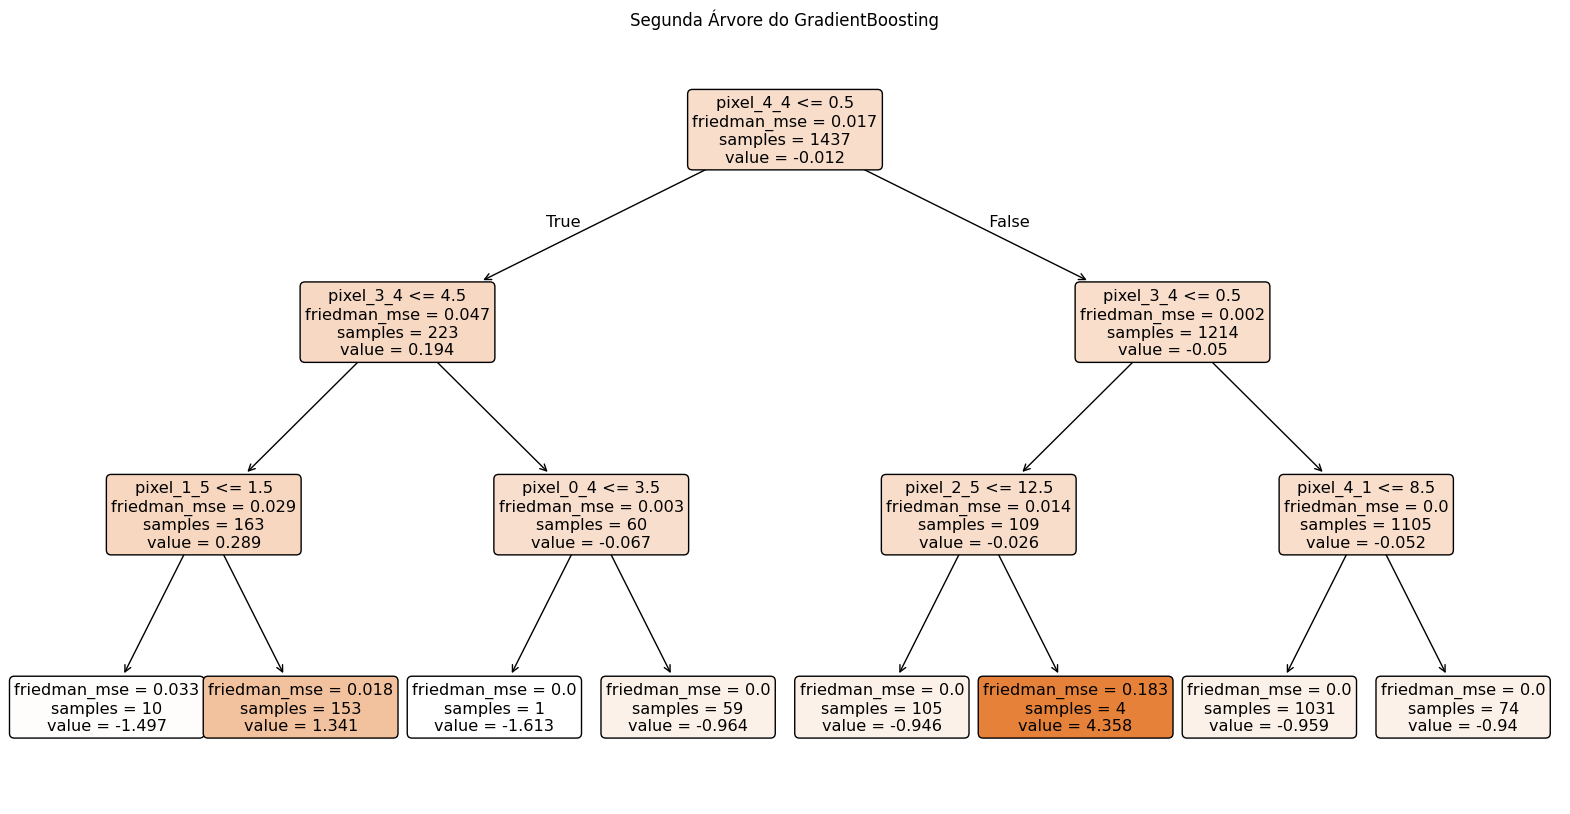

In [35]:
plt.figure(figsize=(20, 10))
plot_tree(gradientboost.estimators_[1, 0] , feature_names=digits.feature_names, class_names=digits.target_names, filled=True, rounded=True, label='all', impurity=True)
plt.title("Segunda Árvore do GradientBoosting")
plt.show()


In [40]:
with open('../app/model/gradientboost.pkl', 'wb') as f:
    pickle.dump(gradientboost, f)
